In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #opencv library which is used for image and video processing in models.performs various functions like 
#converting the image into a numpy array
from PIL import Image
from keras.datasets import mnist
from tensorflow.math import confusion_matrix 
%matplotlib inline


In [2]:
'''loading the mnist data
the data is already processed i.e. it is already in array and also splitted into train and test data'''
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits. Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. Since each image has 28 by 28 pixels, we get a 28x28 array.

grayscale-1 channel

In [4]:
#printing an image 
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

0


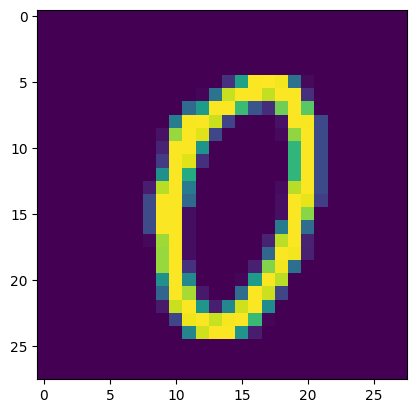

In [5]:
#printing the image and its correpsonding label
plt.imshow(X_train[1000])
print(y_train[1000])

In [6]:
#printing the label values
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
#these all the values are in 0-255 
#in order to make it more convenient we convert it into 0-1 by scaling these values
X_train=X_train/255
X_test=X_test/255


In [8]:
print(X_test,X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[[0. 0. 0

In [9]:
#building the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
])

In [10]:
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

The adam optimizer is one of the optimizer for the neural networks which basically optimzes the various paramters like the weights and biases and uses the best one for the model. its like gradient descent for the logistic regression.

In [11]:
model.fit(X_train,y_train,validation_split=0.2,epochs=15)

Epoch 1/15


1500/1500 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8901 - val_loss: 0.1848 - val_accuracy: 0.9438
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1572 - accuracy: 0.9536 - val_loss: 0.1408 - val_accuracy: 0.9573
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1164 - accuracy: 0.9646 - val_loss: 0.1264 - val_accuracy: 0.9642
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0959 - accuracy: 0.9707 - val_loss: 0.1242 - val_accuracy: 0.9637
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9751 - val_loss: 0.1099 - val_accuracy: 0.9668
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9784 - val_loss: 0.1274 - val_accuracy: 0.9630
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.1209 - val_accurac

train data accuracy= 99.08%

In [12]:
#retrieving the accuracy and loss
loss,accuracy=model.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1368 - accuracy: 0.9720
0.1368096023797989 0.972000002861023


test data accuracy=96.9%

In [13]:
y_pred=model.predict(X_test)
#printing the predicted label at 10 index 
print(y_pred)


313/313 [==============================] - 1s 2ms/step
[[6.6566328e-03 1.7063169e-01 8.4067339e-01 ... 1.0000000e+00
  2.2786668e-01 9.9105448e-01]
 [6.9173711e-07 9.7481710e-01 9.9999988e-01 ... 1.8463253e-11
  2.2125670e-03 3.8785752e-04]
 [1.9962594e-03 9.9998373e-01 4.0786597e-01 ... 7.5914568e-01
  4.1089460e-01 1.1286632e-03]
 ...
 [1.0259721e-07 5.8993041e-03 5.7272209e-10 ... 9.9979633e-01
  9.4740726e-02 9.7188216e-01]
 [7.8468013e-08 2.4169508e-06 2.3570608e-09 ... 2.6366241e-08
  7.7552843e-01 1.8205143e-06]
 [8.9168507e-01 1.1912995e-08 8.7697714e-05 ... 1.5555094e-11
  4.1145489e-01 1.0328231e-06]]


In [14]:
#the actual label at 10 index is 0 and hence the probability of being 0 is 0.9.
print(y_test[10])

0


In [15]:
print(X_test[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
#converting the prediction probaility to class label
predicted_label=[np.argmax(i) for i in y_pred]
predicted_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 8,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 3,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


Confusion matrix

In [17]:
conf_matrix=confusion_matrix(y_test,predicted_label)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    2,    0,    1,    1,    0,    0,    2],
       [   0, 1123,    3,    2,    0,    2,    3,    0,    2,    0],
       [   5,    0, 1003,    5,    1,    2,    3,    7,    6,    0],
       [   1,    0,   12,  974,    1,    6,    0,    3,    8,    5],
       [   3,    0,    4,    1,  939,    1,    7,    7,    1,   19],
       [   5,    0,    0,    8,    1,  861,    9,    1,    5,    2],
       [  11,    2,    1,    1,    2,    3,  938,    0,    0,    0],
       [   1,    6,   10,    6,    1,    2,    0,  996,    1,    5],
       [   7,    1,    3,    6,    3,    5,    6,    4,  937,    2],
       [   8,    2,    1,    4,    8,    3,    0,    4,    5,  974]])>

Text(0.5, 80.7222222222222, 'Predicted label')

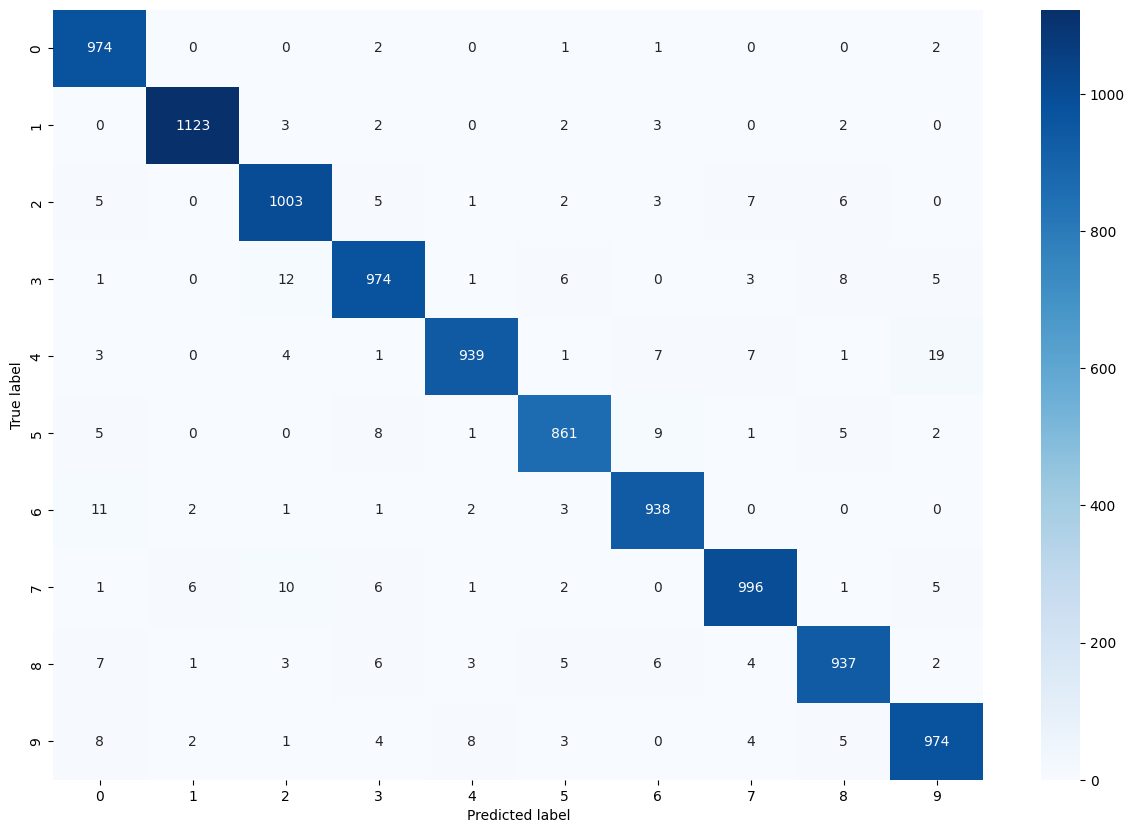

In [18]:
#converting the confusion matrix to a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("Predicted label")

the above heatmap tells us about the number of correct prediction made by the model against each true value 
e.g. for the true label '0' the number of predictions as 0 are 962, similarly for true label as 0 the model has not predicted as 1 and the model as three times predicted as 2 

Building the predictive function

In [19]:
def predict(file_path):
    input_image=file_path
    img=cv2.imread(input_image)
    show_img=plt.imshow(img)
    img_grayscale=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img_resize=cv2.resize(img_grayscale,(28,28))
    img_resize=img_resize/255
    img_reshape=np.reshape(img_resize,[1,28,28])
    prediction=model.predict(img_reshape)
    output_label=np.argmax(prediction)
    print("The recognised handwritten digit is: ",output_label)
    
    return(
        show_img,
        output_label
    )